In [1]:
# DataVisualization
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Stats
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 表示桁数の指定
%precision 3

'%.3f'

In [2]:
data = pd.read_csv('pokemon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


### 相関

In [4]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


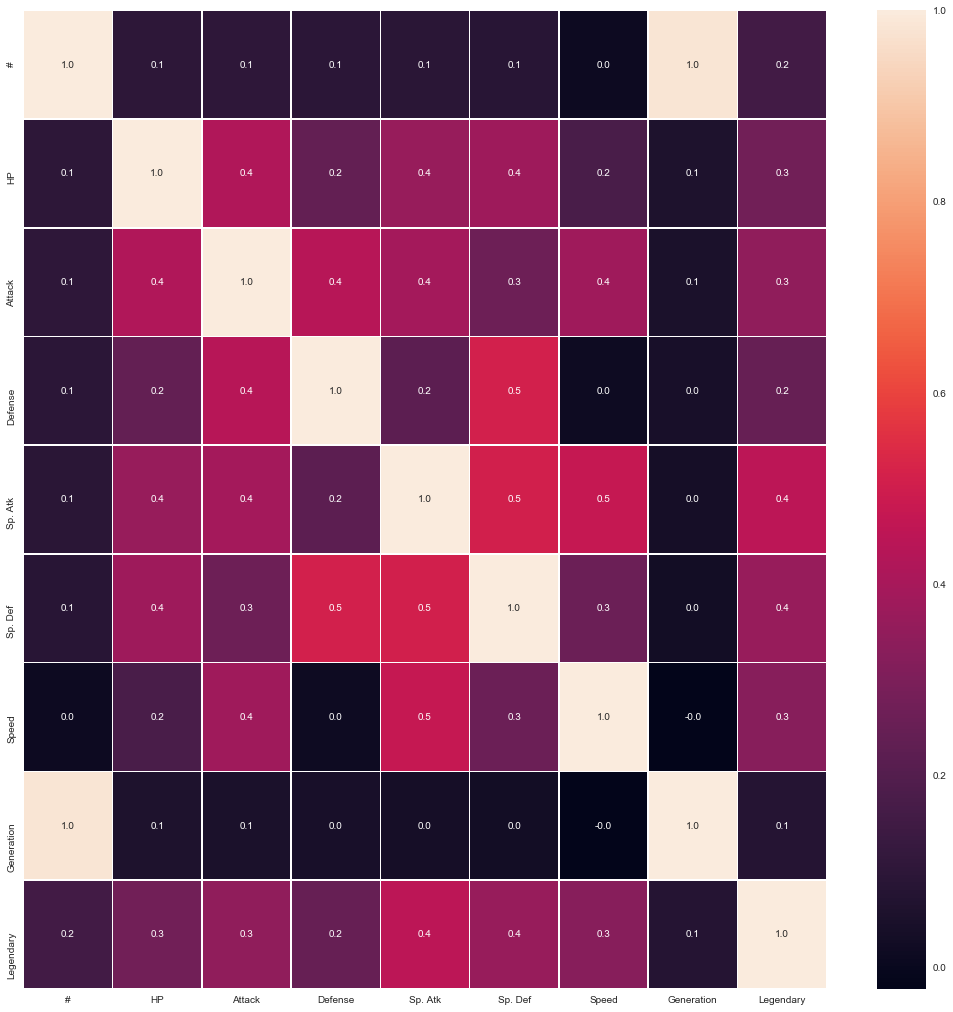

In [5]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [6]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [7]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Introduction to Python

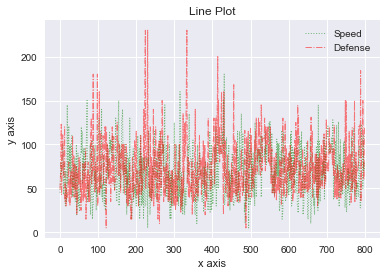

In [8]:
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')            
plt.show()

Text(0.5,1,'Attack Defense Scatter Plot')

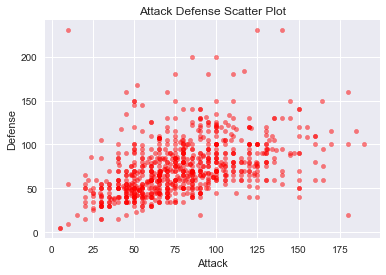

In [9]:
data.plot(kind='scatter', x = 'Attack', y='Defense', alpha=0.5, color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

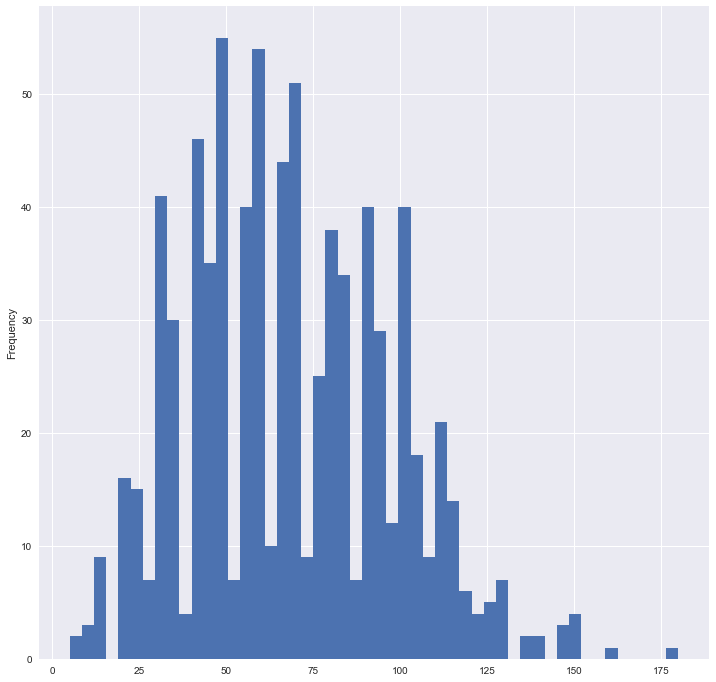

In [10]:
# ヒストグラム
data.Speed.plot(kind='hist', bins=50, figsize=(12, 12))
plt.show()

In [11]:
plt.clf()

<Figure size 432x288 with 0 Axes>

### Pandas

In [12]:
x = data['Defense'] > 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [13]:
x = data['Speed'] > 175
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,3,True


In [14]:
# 200よりも守備が大きく、100よりも攻撃が高いものが2匹存在する。
data[np.logical_and(data['Defense'] > 200, data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [15]:
# 上記と同じ
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


### Cleaning Data

In [16]:
data.shape

(800, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [18]:
print(data['Type 1'].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [19]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### VISUAL EXPLORATORY DATA ANALYSIS

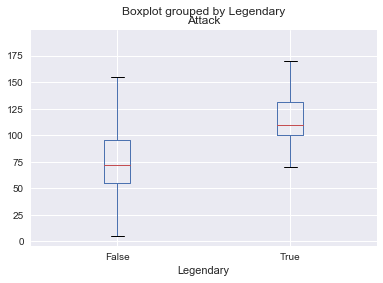

In [20]:
data.boxplot(column='Attack', by='Legendary')

### TIDY DATA

In [23]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [26]:
# meltについて
# id_vars : meltしたくないもの
# value_vars : meltしたいもの
melted = pd.melt(frame=data_new, id_vars='Name', value_vars=['Attack', 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


### CONCATENATING DATA

In [31]:
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1, data2], axis=0, ignore_index =True)
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [34]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1, data2], axis=1, ignore_index =False)

conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


### VISUAL EXPLORATORY DATA ANALYSIS

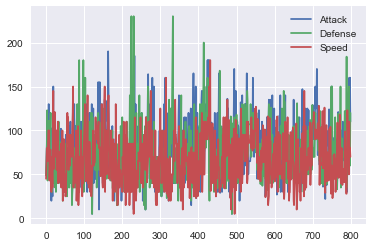

In [38]:
data1 = data.loc[:,['Attack', 'Defense', 'Speed']]
data1.plot()

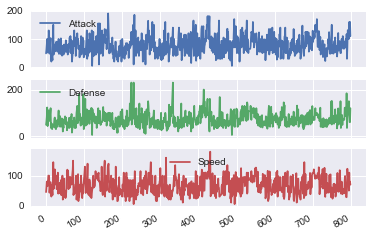

In [43]:
data1.plot(subplots=True)
plt.show()

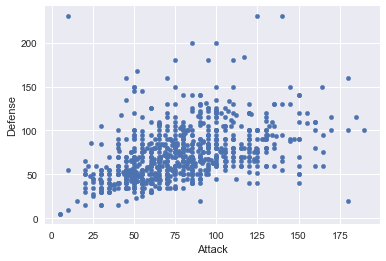

In [45]:
data1.plot(kind='scatter', x='Attack', y='Defense')
plt.show()

/Users/Takanori/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

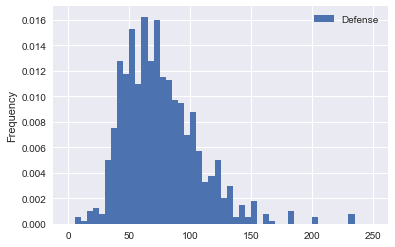

In [47]:
# ヒストグラム
data1.plot(kind='hist', y='Defense', bins=50, range=(0,250), normed=True)
plt.plot()

###  INDEXING PANDAS TIME SERIES

In [49]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1]))
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [53]:
import warnings
warnings.filterwarnings("ignore")

data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,date
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1992-01-10
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,1992-02-10
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,1992-03-10
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,1993-03-15
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,1993-03-16


In [54]:
data2 = data2.set_index("date")
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [56]:
print(data2.loc["1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object


In [57]:
print(data2.loc["1992-03-10":"1993-03-16"])

            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  
